## Construire une table des noms communs étiqutée en genre et en nombre à partir du dictionnaire le-DM

In [72]:
from IPython.display import display, HTML
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
files = ["A.txt", "ADV.txt", "F.txt", "N.txt", "V.txt", "gpl.txt", "lisez-moi.txt"] 

In [4]:
# for f in  files:
#     url ="https://huggingface.co/datasets/FrancophonIA/le-DM/resolve/main/tableaux-txt/"+f
#     urllib.request.urlretrieve(url, f)

#     print("Download complete.")

# # https://www.ortolang.fr/market/lexicons/le-dm


In [5]:
# url = "https://repository.ortolang.fr/api/content/le-dm/1/dm_documentation.pdf"
# urllib.request.urlretrieve(url, "dm_documentation.pdf")

# url = "https://repository.ortolang.fr/api/content/le-dm/1/ftrouilleux_Le_DM_a_French_Dictionary_for_NooJ.pdf"
# urllib.request.urlretrieve(url, "ftrouilleux_Le_DM_a_French_Dictionary_for_NooJ.pdf")


# print("Download complete.")

In [6]:

for f in files[:5]:
    print(f, " ", end="")
    with open(f) as fichier:
        lines = sum(1 for n in fichier)
        print(str(lines), " lignes")
        
        # Remettre le pointeur au début
        fichier.seek(0)

        for _ in range(4):
            ligne = fichier.readline()
            if not ligne:  # Arrête si la fin du fichier est atteinte
                break
            print(ligne.strip())
    print('-'*50)

A.txt  60477  lignes
Forme	Lemme	Cat	Genre	Nb	Pers	Temps	Spec	Fonc	Gvn/Dist/Aux	Graph	Lang	Cmp	FLX	DRV	UNAMB	Ref	Sem	Info/Accent
quel	quel	A	m	s			int						S_DE
quels	quel	A	m	p			int						S_DE
quelle	quel	A	f	s			int						S_DE
--------------------------------------------------
ADV.txt  2707  lignes
Forme	Lemme	Cat	Genre	Nb	Pers	Temps	Spec	Fonc	Gvn/Dist/Aux	Graph	Lang	Cmp	FLX	DRV	UNAMB	Ref	Sem	Info/Accent
premièrement	premier	ADV					ord						ERS_ERE	EREMENT:NUL 				dadj
deuxièmement	deuxième	ADV					ord						S_0	MENT:NUL 				dadj
secondement	second	ADV					ord						S_E	EMENT:NUL 				dadj
--------------------------------------------------
F.txt  2308  lignes
Forme	Lemme	Cat	Genre	Nb	Pers	Temps	Spec	Fonc	Gvn/Dist/Aux	Graph	Lang	Cmp	FLX	DRV	UNAMB	Ref	Sem	Info/Accent
voici	voici	PRES
voilà	voilà	PRES
revoici	voici	PRES
--------------------------------------------------
N.txt  94672  lignes
Forme	Lemme	Cat	Genre	Nb	Pers	Temps	Spec	Fonc	Gvn/Dist/Aux	Graph	Lang	Cmp	FLX	DRV	UNAMB	Ref	Sem	Info

#### importer N.txt dans un dataframe et faire une analyse

In [7]:
df = pd.read_csv("N.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94671 entries, 0 to 94670
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Forme         94671 non-null  object 
 1   Lemme         94671 non-null  object 
 2   Cat           94671 non-null  object 
 3   Genre         94353 non-null  object 
 4   Nb            94353 non-null  object 
 5   Pers          0 non-null      float64
 6   Temps         0 non-null      float64
 7   Spec          291 non-null    object 
 8   Fonc          0 non-null      float64
 9   Gvn/Dist/Aux  0 non-null      float64
 10  Graph         3792 non-null   object 
 11  Lang          837 non-null    object 
 12  Cmp           7893 non-null   object 
 13  FLX           94345 non-null  object 
 14  DRV           0 non-null      float64
 15  UNAMB         8326 non-null   object 
 16  Ref           0 non-null      float64
 17  Sem           317 non-null    object 
 18  Info/Accent   0 non-null  

/tmp/ipykernel_33092/150847655.py:1: DtypeWarning: Columns (7,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("N.txt", sep="\t")


In [8]:
# Supprimer les colonnes entièrement vides
df.dropna(axis=1, how='all', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94671 entries, 0 to 94670
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Forme   94671 non-null  object
 1   Lemme   94671 non-null  object
 2   Cat     94671 non-null  object
 3   Genre   94353 non-null  object
 4   Nb      94353 non-null  object
 5   Spec    291 non-null    object
 6   Graph   3792 non-null   object
 7   Lang    837 non-null    object
 8   Cmp     7893 non-null   object
 9   FLX     94345 non-null  object
 10  UNAMB   8326 non-null   object
 11  Sem     317 non-null    object
dtypes: object(12)
memory usage: 8.7+ MB


In [9]:
# que contient la colonne "Spec" ?
Spec = set(df["Spec"].dropna())
print(Spec)
# Print the output in wrap mode in a wider column
output = df[df["Spec"].notna()].Forme.to_list()
display(HTML('<div style="width: 1000px; white-space: pre-wrap;">{}</div>'.format(output)))
# « noms propres », en fait des noms qui peuvent constituer un groupe nominal sujet sans déterminant, ex. madame, octobre

{'npr'}


In [10]:
# aucun genre n'est renseigné pour les noms propres
print(df[df['Genre'].notna() & df['Spec'].notna()])

Empty DataFrame
Columns: [Forme, Lemme, Cat, Genre, Nb, Spec, Graph, Lang, Cmp, FLX, UNAMB, Sem]
Index: []


In [11]:
# recherche des mots avec sémantique (Sem = "Region", "Initiale"...) avec genre
print(df[df['Genre'].notna() & df['Sem'].notna()])

Empty DataFrame
Columns: [Forme, Lemme, Cat, Genre, Nb, Spec, Graph, Lang, Cmp, FLX, UNAMB, Sem]
Index: []


In [12]:
# supprimer les lignes avant de supprimer les colonnes !!!

print(df.shape)

df.drop(df[df['Sem'].notna()].index, inplace=True)
df.drop(df[df['Spec'].notna()].index, inplace=True)

# supprimer colonnes Sem, Cat=N et Spec
# et aussi FLX sans intérêt après examen

df.drop(columns=['Sem','Spec', 'Cat', 'FLX'], inplace=True)
print(df.shape)
df.info()

(94671, 12)
(94354, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 94354 entries, 76 to 94670
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Forme   94354 non-null  object
 1   Lemme   94354 non-null  object
 2   Genre   94353 non-null  object
 3   Nb      94353 non-null  object
 4   Graph   3790 non-null   object
 5   Lang    837 non-null    object
 6   Cmp     7893 non-null   object
 7   UNAMB   8326 non-null   object
dtypes: object(8)
memory usage: 6.5+ MB


In [13]:
# que contient la colonne "Lang" ?
Lang = sorted(set(df["Lang"].dropna().unique()))
lang_counts = df["Lang"].value_counts().to_dict()
print(lang_counts)
print(Lang)
# 'en': 'English',
# 'es': 'Spanish',
# 'it': 'Italian',
# 'la': 'Latin',

{'en': 595, 'la': 120, 'it': 35, 'es': 12, 'tk': 10, 'ms': 9, 'zh': 9, 'de': 9, 'he': 6, 'bo': 4, 'vi': 4, 'ar': 4, 'br': 4, 'pt': 2, 'afa': 2, 'id': 2, 'ja': 2, 'oc': 2, 'bnt': 2, 'no': 2, 'hi': 1, 'sai': 1}
['afa', 'ar', 'bnt', 'bo', 'br', 'de', 'en', 'es', 'he', 'hi', 'id', 'it', 'ja', 'la', 'ms', 'no', 'oc', 'pt', 'sai', 'tk', 'vi', 'zh']


In [14]:
print(df[df["Lang"].notna()][["Forme", "Lang"]].sample(n=20))

                  Forme Lang
88873        cash=flows   en
93560      self=defence   en
90514      gulf=streams   en
93780  suave=mari=magno   la
90545         hard=bops   en
92676     post=scriptum   la
93085         ray=grass   en
90804          jet=sets   en
89849         fan=clubs   en
89887         feed_back   en
88036        arrow=root   en
92673       post=partum   la
93956   terra=incognita   la
89696       dry=farming   en
94614     walkie=talkie   en
91722         ossobucos   it
90529        half=track   en
91595    no=man's=lands   en
87822       after_shave   en
90632     home=trainers   en


In [15]:
# que contient la colonne "Cmp" ?
# Les  noms,  verbes  et  adjectifs  composés  proprement  français  ont  un  attribut  Cmp  dont  la  valeur  indique  le  schéma  de 
# composition. Le tableau 4 donne les fréquences des schémas dont le code est obtenu par croisement des entêtes de ligne et de 
# colonnes.  Ainsi,  par  exemple,  800  lemmes  sont  construits  sur  un  schéma  préfixe-nom  (code  PFX_N).  A  ces  47  codes 
# s’ajoutent 6 autres codes, décrits dans le tableau 5. 
Cmp = sorted(set(df["Cmp"].dropna().unique()))
print("nombre de schémas de composition: ", len(Cmp))
print(Cmp)

nombre de schémas de composition:  48
['ADV_A', 'ADV_N', 'ADV_PP', 'ADV_V', 'A_A', 'A_G', 'A_GP', 'A_N', 'A_PP', 'A_V', 'G_N', 'NUM', 'NUM_GP', 'NUM_N', 'NUM_NUM', 'N_A', 'N_ADV', 'N_G', 'N_GN', 'N_GP', 'N_N', 'N_PP', 'PFX_A', 'PFX_N', 'PFX_NUM', 'PFX_PRO', 'PFX_SFX', 'PFX_V', 'PH', 'PP_GP', 'PP_PP', 'P_GN', 'P_N', 'P_NUM', 'P_PRO', 'P_V', 'QREP', 'REP', 'TBD', 'V_A', 'V_ADV', 'V_GN', 'V_GP', 'V_N', 'V_NUM', 'V_PRO', 'V_V', 'dCMP']


In [16]:
# créer ds listes de caractères utilisés dans Forme et Lemme
# Concatenate all words in the 'Forme' column into a single string
forme_words = ''.join(df['Forme'].dropna())
# Create a set of unique characters
forme_chars = sorted(set(forme_words)) # transformé en liste triée
# Concatenate all words in the 'Forme' column into a single string
lemme_words = ''.join(df['Lemme'].dropna())
# Create a set of unique characters
lemme_chars = sorted(set(lemme_words)) # transformé en liste triée

print("Forme chars:")
display(HTML('<div style="width: 1000px; white-space: pre-wrap;">{}</div>'.format(forme_chars)))
print("Lemme chars:")
display(HTML('<div style="width: 1000px; white-space: pre-wrap;">{}</div>'.format(lemme_chars)))
print("list of chars identical: ",forme_chars==lemme_chars)

Forme chars:


Lemme chars:


list of chars identical:  False


In [17]:
s_f = set(forme_chars)
s_l = set(lemme_chars)
s_az = set([chr(i) for i in range(ord('a'), ord('z')+1)])
s_AZ = set([chr(i) for i in range(ord('A'), ord('Z')+1)])

s_f_m_az = sorted(s_f - s_az)
print(s_f_m_az)
s_l_m_az = sorted(s_l - s_az)
print(s_l_m_az)
print(sorted(s_f - s_l))
print(sorted(s_l - s_f))
print(sorted(s_l | s_f))
print(sorted((s_l | s_f) - s_az))

[' ', "'", '-', '.', '4', '8', '=', '_', '°', 'à', 'â', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ñ', 'ô', 'ö', 'û', 'ü', 'œ', '’']
[' ', "'", '-', '.', '1', '2', '3', '4', '8', '=', 'A', 'D', 'F', 'M', 'N', 'P', 'R', '_', 'à', 'â', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ñ', 'ô', 'û', 'ü', 'œ']
['°', 'ö', '’']
['1', '2', '3', 'A', 'D', 'F', 'M', 'N', 'P', 'R']
[' ', "'", '-', '.', '1', '2', '3', '4', '8', '=', 'A', 'D', 'F', 'M', 'N', 'P', 'R', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '°', 'à', 'â', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ñ', 'ô', 'ö', 'û', 'ü', 'œ', '’']
[' ', "'", '-', '.', '1', '2', '3', '4', '8', '=', 'A', 'D', 'F', 'M', 'N', 'P', 'R', '_', '°', 'à', 'â', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ñ', 'ô', 'ö', 'û', 'ü', 'œ', '’']


In [18]:
# caratères de Forme non-alphanumériques

s_f_notalpha = [l for l in s_f_m_az if not l.isalpha()]
print(s_f_notalpha)
print([ord(i) for i in s_f_notalpha])

[' ', "'", '-', '.', '4', '8', '=', '_', '°', '’']
[32, 39, 45, 46, 52, 56, 61, 95, 176, 8217]


In [19]:
resultats = {}

for lettre in s_f_notalpha:
    # Utilisez str.contains pour vérifier si la colonne "Forme" contient la lettre
    count = df[df['Forme'].str.contains(lettre, case=False, na=False)].shape[0]
    resultats[lettre] = count

# Affichez les résultats
for lettre, count in resultats.items():
    print(f"# La lettre '{lettre}' apparaît dans {count} lignes\t> ")

# La lettre ' ' apparaît dans 312 lignes	> 
# La lettre ''' apparaît dans 172 lignes	> 
# La lettre '-' apparaît dans 2838 lignes	> 
# La lettre '.' apparaît dans 94354 lignes	> 
# La lettre '4' apparaît dans 2 lignes	> 
# La lettre '8' apparaît dans 1 lignes	> 
# La lettre '=' apparaît dans 4503 lignes	> 
# La lettre '_' apparaît dans 948 lignes	> 
# La lettre '°' apparaît dans 1 lignes	> 
# La lettre '’' apparaît dans 172 lignes	> 


In [20]:
# vérifier le nombre de lignes qui contiennent vraiment "."
df[df['Forme'].str.contains("\\.", case=False, na=False)]

,Forme,Lemme,Genre,Nb,Graph,Lang,Cmp,UNAMB
88211,b.a.=ba,b.a. ba,m,s,NaN,NaN,TBD,UNAMB
88212,b.a.=ba,b.a. ba,m,p,NaN,NaN,TBD,UNAMB


In [21]:
# La lettre ' ' apparaît dans 312 lignes	> Ok
# La lettre ''' apparaît dans 172 lignes	> Ok guillemet usuel
# La lettre '-' apparaît dans 2838 lignes	> Ok
# La lettre '.' apparaît dans 94354 lignes	> en fait 2 lignes (b.a. ba)> supprimer
# La lettre '4' apparaît dans 2 lignes	    > supprimer la ligne
# La lettre '8' apparaît dans 1 lignes	    > supprimer la ligne
# La lettre '=' apparaît dans 4503 lignes	> à traiter 
# remplacer par " " ou "-" selon la prémière occurence trouvée dans Lemme
# seulle exception "self-made man" avec 2 séparateurs différents
# La lettre '_' apparaît dans 948 lignes	> à traiter
# 3 cas: supprimer "_", remplacer par "-" ou par " " (pas de lemme avec " " et "-")
# La lettre '°' apparaît dans 1 lignes	    > supprimer la ligne
# La lettre '’' apparaît dans 172 lignes	> supprimer, guillemet bizarre
# (doublons corrects existent)

In [22]:
# la liste hors caractères alphanumériques
print(s_f_notalpha)

[' ', "'", '-', '.', '4', '8', '=', '_', '°', '’']


In [23]:
# suppression les lignes problématiques
a_supprimer = ['\\.', '4', '8', '°', '’']

print(df.shape)
for l in a_supprimer:
    df.drop(df[df['Forme'].str.contains(l)].index, inplace=True)

print(df.shape)

(94354, 8)
(94176, 8)


In [24]:

# remplacement des séparateurs "=" et "_"

# fonction explicite pour remplacer les séparateurs
def clean_sep(row):
    f, l = row[['Forme','Lemme']]
    if "=" in f:
        sep = "-" if "-" in l else " " if " " in l else ""
        f = f.replace("=", sep)
        return f
    elif "_" in f:
        sep = "-" if "-" in l else " " if " " in l else ""
        f = f.replace("_", sep)
        return f

    return f

# Ajouter une nouvelle colonne en utilisant la fonction directement avec apply
df['Entry'] = df.apply(clean_sep, axis=1)

In [30]:
# créer ds listes de caractères utilisés dans entry
# Déplacement de la colonne 'Entry' en première position :
df = df.reindex(columns=['Entry'] + [col for col in df.columns if col != 'Entry'])

entry_words = ''.join(df['Entry'].dropna())
entry_chars = sorted(set(entry_words)) # transformé en liste triée

print("Entry chars {} lettres".format(len(entry_chars)))
display(HTML('<div style="width: 1000px; white-space: pre-wrap;">{}</div>'.format(entry_chars)))

Entry chars 43 lettres


94176 26


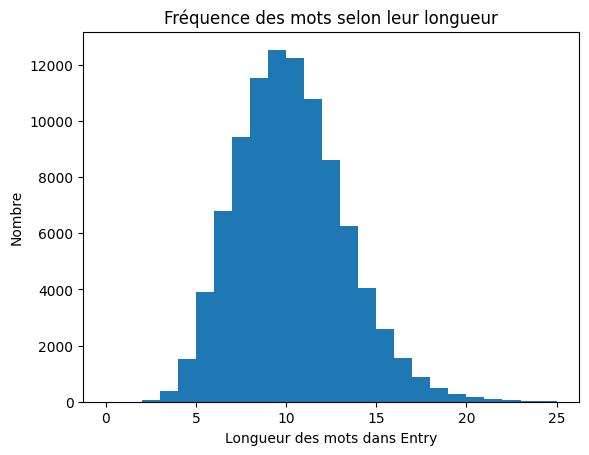

In [26]:
# traçer un histogramme de la longueur des mots dans Entry

serie = df["Entry"]
print(serie.str.len().count(), serie.str.len().max())
# We can set the number of bins with the *bins* keyword argument.
plt.hist(serie.str.len(), bins=range(serie.str.len().max()))

# Ajouter des titres et des étiquettes
plt.title('Fréquence des mots selon leur longueur')
plt.xlabel('Longueur des mots dans Entry')
plt.ylabel('Nombre')

plt.show()

In [31]:
# > œ >> oe
# > æ >> ae
df['Entry'] = df['Entry'].apply(lambda x: x.replace("œ", "oe").replace("æ", "ae"))

# > enlever mots d'origine étrangère
print(df.shape)
df.drop(df[df['Lang'].notna()].index, inplace=True)
print(df.shape)

(94176, 9)
(93347, 9)


In [40]:
# enlever les doublons

noms = df[['Entry', 'Genre', 'Nb']]
print(noms.info())
noms = noms.drop_duplicates()
print("-" * 38)
print(noms.info())

<class 'pandas.core.frame.DataFrame'>
Index: 93347 entries, 318 to 94670
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entry   93347 non-null  object
 1   Genre   93347 non-null  object
 2   Nb      93347 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB
None
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 92762 entries, 318 to 94670
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entry   92762 non-null  object
 1   Genre   92762 non-null  object
 2   Nb      92762 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB
None


In [49]:
# Identifier les doublons basés sur toutes les colonnes
doublons = df[df[['Entry', 'Genre', 'Nb', 'Cmp']].duplicated(keep=False)]

# Afficher les doublons
print("Doublons basés sur toutes les colonnes :")
print(doublons.info())

Doublons basés sur toutes les colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 1136 entries, 391 to 94387
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entry   1136 non-null   object
 1   Forme   1136 non-null   object
 2   Lemme   1136 non-null   object
 3   Genre   1136 non-null   object
 4   Nb      1136 non-null   object
 5   Graph   119 non-null    object
 6   Lang    0 non-null      object
 7   Cmp     210 non-null    object
 8   UNAMB   192 non-null    object
dtypes: object(9)
memory usage: 88.8+ KB
None


In [71]:
# faire 4 fichiers txt des noms fs, ms, fp, mp
noms.head()

fs = list(noms[(noms['Genre'] == 'f') & (noms['Nb'] == 's')]['Entry'])
ms = list(noms[(noms['Genre'] == 'm') & (noms['Nb'] == 's')]['Entry'])
fp = list(noms[(noms['Genre'] == 'f') & (noms['Nb'] == 'p')]['Entry'])
mp = list(noms[(noms['Genre'] == 'm') & (noms['Nb'] == 'p')]['Entry'])
print(noms.shape[0], ":", len(fs), "+", len(ms), "+", len(fp), "+", len(mp), "=", len(fs)+len(ms)+len(fp)+len(mp))

92762 : 21520 + 24861 + 21575 + 24806 = 92762


In [80]:
# Create the files
# Create the files

output_directory = "../tests/data/noms/"
os.makedirs(output_directory, exist_ok=True)

for filename, content in zip( ['fs.txt','ms.txt','fp.txt','mp.txt'], [fs,ms,fp,mp]):
    filepath = os.path.join(output_directory, filename)
    with open(filepath, 'w') as file:
        for line in content:
            file.write(line + "\n")  # Add a newline after each string

        
